In [38]:
import pandas as pd
#Convert all text to lowercase letters.
movie_review = pd.read_csv('labeledTrainData.tsv', sep='\t', header=0)
#movie_review.head()
movie_review['review'] = movie_review['review'].apply(lambda x: x.lower())
movie_review.head()

,id,sentiment,review
0,5814_8,1,with all this stuff going down at the moment w...
1,2381_9,1,"\the classic war of the worlds\"" by timothy hi..."
2,7759_3,0,the film starts with a manager (nicholas bell)...
3,3630_4,0,it must be assumed that those who praised this...
4,9495_8,1,superbly trashy and wondrously unpretentious 8...


In [39]:
#Remove punctuation and special characters from the text.
import re
movie_review['review'] = movie_review['review'].apply(lambda x: re.sub('\W+',' ',x))
movie_review.head()

,id,sentiment,review
0,5814_8,1,with all this stuff going down at the moment w...
1,2381_9,1,the classic war of the worlds by timothy hine...
2,7759_3,0,the film starts with a manager nicholas bell g...
3,3630_4,0,it must be assumed that those who praised this...
4,9495_8,1,superbly trashy and wondrously unpretentious 8...


In [40]:
import nltk
#remove stop words
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize

def remove_stop_word(s):
    stop_words = set(stopwords.words('english'))

    word_tokens = word_tokenize(s)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    filtered_sentence = ''

    for w in word_tokens:
        if w not in stop_words:
            filtered_sentence = filtered_sentence+w+' '
    return filtered_sentence
            

movie_review['review_wo_stop'] = movie_review['review'].apply(lambda x: remove_stop_word(x))
movie_review.head()

#Apply NLTK’s PorterStemmer.

# import these modules
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

ps = PorterStemmer()

def apply_porterstemmer(s):
    word_tokens = word_tokenize(s)
    stemmed_sentence = ''
    for w in word_tokens:
        if w.isalpha():
            stemmed_sentence=stemmed_sentence+ps.stem(w)+' '
    return stemmed_sentence

movie_review['stemmed_sentence'] = movie_review['review_wo_stop'].apply(lambda x: apply_porterstemmer(x))
movie_review.head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\atanu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\atanu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,id,sentiment,review,review_wo_stop,stemmed_sentence
0,5814_8,1,with all this stuff going down at the moment w...,stuff going moment mj started listening music ...,stuff go moment mj start listen music watch od...
1,2381_9,1,the classic war of the worlds by timothy hine...,classic war worlds timothy hines entertaining ...,classic war world timothi hine entertain film ...
2,7759_3,0,the film starts with a manager nicholas bell g...,film starts manager nicholas bell giving welco...,film start manag nichola bell give welcom inve...
3,3630_4,0,it must be assumed that those who praised this...,must assumed praised film greatest filmed oper...,must assum prais film greatest film opera ever...
4,9495_8,1,superbly trashy and wondrously unpretentious 8...,superbly trashy wondrously unpretentious 80 ex...,superbl trashi wondrous unpretenti exploit hoo...


In [41]:
stemmed_review = movie_review.loc[:,['stemmed_sentence','sentiment']]

In [42]:
from sklearn.model_selection import train_test_split

y=stemmed_review.sentiment

X_train, X_test, y_train, y_test  = train_test_split(
        stemmed_review['stemmed_sentence'], y,
        test_size=0.20, 
        random_state=1234)


In [37]:
X_train.head()

6617     becam movi trilog us familiar lot sheer action...
16547    antonioni aim anoth hip masterpiec time side a...
16196    tourist head ireland school trip learn druid e...
11646    freddi dead smartest thing could done disappoi...
3203     sista da hood look reveng bling bling except d...
Name: stemmed_sentence, dtype: object

In [47]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
 
# Initialize the model
vectorizer = TfidfVectorizer()
 
# Train the model
train_matrix =  vectorizer.fit_transform(X_train)
print(train_matrix.shape)

(20000, 45511)


In [48]:
#applying TF-IDF on test data
tfidf_test = vectorizer.transform(X_test)

In [61]:
X_test.shape

(5000,)

In [49]:
#first 10 records
print(vectorizer.get_feature_names()[:10])

['aa', 'aaa', 'aaaaaaah', 'aaaaah', 'aaaaatch', 'aaaahhhhhhh', 'aaaarrgh', 'aaah', 'aaargh', 'aaaugh']


C:\Users\atanu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [50]:
# Print the first 5 vectors of the tfidf training data
print(train_matrix.A[:5])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# logistic regression

In [54]:
import sklearn
model = sklearn.linear_model.LogisticRegression(random_state=0, solver='lbfgs',
                            multi_class='multinomial')
model.fit(train_matrix, y_train)

C:\Users\atanu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial', random_state=0)

In [55]:
#predicting the test
test_data_features = vectorizer.transform(X_test)

In [56]:
# Use the logistic regression model to make sentiment label predictions
result = model.predict(test_data_features)

In [60]:
print(len(result))

5000


In [69]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % accuracy_score(y_test, result))

Accuracy: 0.886


In [70]:
#creating confustion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, result)

array([[2219,  330],
       [ 242, 2209]], dtype=int64)

In [71]:
#precision, recall, and F1-score
from sklearn.metrics import precision_score, recall_score, f1_score 
print('Precision: %.3f' % precision_score(y_test, result))
print('Recall: %.3f' % recall_score(y_test, result))
print('F1 Score: %.3f' % f1_score(y_test, result))

Precision: 0.870
Recall: 0.901
F1 Score: 0.885


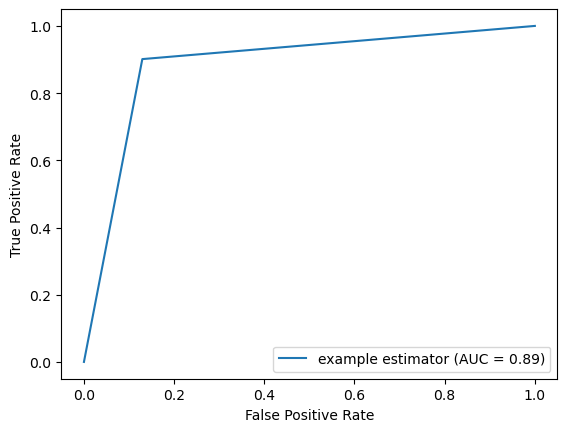

In [74]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, result)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()
plt.show()

# Support Vector Machine

In [75]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=0.025, random_state=101)
model.fit(train_matrix, y_train)

SVC(C=0.025, kernel='linear', random_state=101)

In [76]:
result = model.predict(test_data_features)

In [77]:
print('Accuracy: %.3f' % accuracy_score(y_test, result))

Accuracy: 0.815


In [78]:
confusion_matrix(y_test, result)

array([[1816,  733],
       [ 190, 2261]], dtype=int64)

In [79]:
#precision, recall, and F1-score
print('Precision: %.3f' % precision_score(y_test, result))
print('Recall: %.3f' % recall_score(y_test, result))
print('F1 Score: %.3f' % f1_score(y_test, result))

Precision: 0.755
Recall: 0.922
F1 Score: 0.830


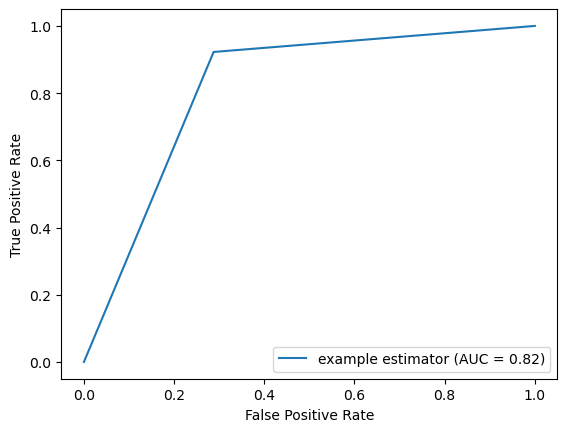

In [80]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, result)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()
plt.show()